### Задание

Создайте нейронную сеть, распознающую рукописные цифры. Используя подготовленную базу и шаблон ноутбука, нормируйте данные, создайте и обучите сверточную сеть.

**Параметры модели:** сеть должна содержать минимум 2 сверточных слоя; полносвязные слои; слои подвыборки, нормализации, регуляризации по 1 шт.

**Гиперпараметры обучения:** функция ошибки - категориальная кроссэнтропия, оптимизатор - Adam с шагом обучения одна тысячная, размер батча - 128, количество эпох 15, детали обучения - отображать.

**В конце** выведите график обучения: доли верных ответов на обучающей и проверочной выборках.


### Импорты

In [ ]:
# Подключение библиотеки для генерации случайных чисел
import random

# Подключение библиотек для отрисовки изображений
import matplotlib.pyplot as plt

# Подключение библиотеки для работы с массивами
import numpy as np

# Подключение класса для работы с изображением
from PIL import Image

# Подключение утилит для to_categorical
from tensorflow.keras import utils

# загрузка датасета MNIST
from tensorflow.keras.datasets import mnist

# Подключение cлоев для работы с нейронными сетями
from tensorflow.keras.layers import (
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Input,
    Flatten,
    MaxPooling2D,
)

# Подключение класса для создания модели нейронной сети
from tensorflow.keras.models import Sequential

# Подключение класса оптимизатора
from tensorflow.keras.optimizers import Adam

# Вывод изображения в ноутбуке, а не в консоли или файле
%matplotlib inline

### Загрузка данных

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # Загрузка датасета MNIST

### Проверка данных

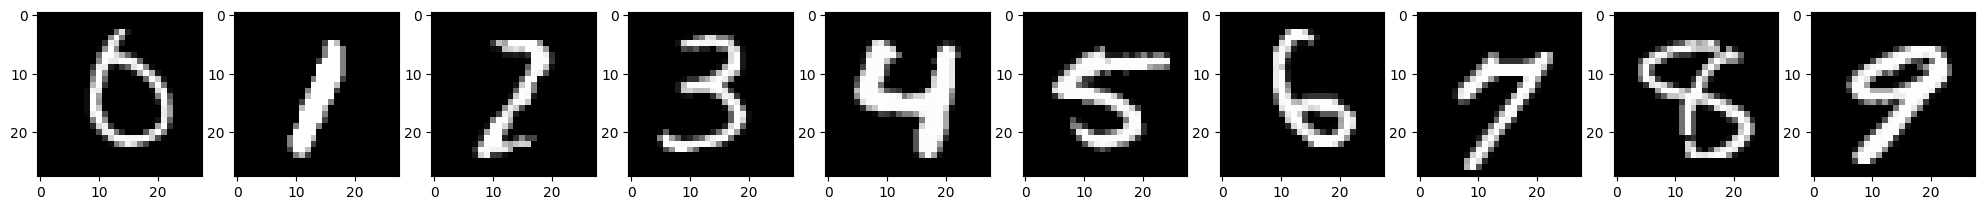

In [ ]:
# вывод изображений каждого класса для ознакомления с датасетом

fig, axs = plt.subplots(
    1, 10, figsize=(25, 3)
)  # создаем полотно для 10 графиков с размером 25 на 3
for i in range(10):
    label_indexes = np.where(y_train == i)[
        0
    ]  # получаем список из индексов положений класса i в y_train
    index = random.choice(
        label_indexes
    )  # выбирает случайный индекс из списка созданного выше
    img = x_train[index]  # выбираем из x_train нужное положение
    axs[i].imshow(Image.fromarray(img), cmap="gray")  # выводим изображение

plt.show()

### Подготовка данных

In [7]:
# добавляем размерность массиву mnist, чтобы сеть поняла что это чб
x_train = (
    x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1) / 255.0
)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1) / 255.0

# преобразуем выборки с ответами в OHE
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# посмотрим форматы выборок перед обучением
print("x_train:", x_train.shape)
print("x_test:", x_test.shape)
print()
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

x_train: (60000, 28, 28, 1)
x_test: (10000, 28, 28, 1)

y_train: (60000, 10)
y_test: (10000, 10)


### Создание и обучение модели

In [ ]:
# Ваше решение
# Создание модели нейронной сети
model = Sequential(
    [
        Input(shape=(28, 28, 1)),
        # Сверточные слои с нормализацией и пулингом
        Conv2D(32, (3, 3), activation="relu", padding="same"),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        # Второй сверточный блок
        Conv2D(64, (3, 3), padding="valid", activation="relu"),

        # Преобразование в вектор
        Flatten(),

        # Полносвязные слои с дропаутом
        Dense(256, activation="relu"),
        Dropout(0.2),
        Dense(10, activation="softmax"),
    ]
)
# Компиляция модели с функцией потерь и оптимизатором
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.15,
    verbose=1,
) # Обучение модели

Epoch 1/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8833 - loss: 0.4266 - val_accuracy: 0.9766 - val_loss: 0.3123
Epoch 2/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9854 - loss: 0.0453 - val_accuracy: 0.9884 - val_loss: 0.0380
Epoch 3/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9912 - loss: 0.0270 - val_accuracy: 0.9907 - val_loss: 0.0400
Epoch 4/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9947 - loss: 0.0170 - val_accuracy: 0.9891 - val_loss: 0.0458
Epoch 5/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9952 - loss: 0.0163 - val_accuracy: 0.9880 - val_loss: 0.0533
Epoch 6/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9965 - loss: 0.0119 - val_accuracy: 0.9880 - val_loss: 0.0544
Epoch 7/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9953 - loss: 0.0127 - val_accuracy: 0.9894 - val_loss: 0.0465
Epoch 8/15
399/399 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9972 - loss: 0.0079 - val_accuracy: 

In [ ]:
_, acc = model.evaluate(
    x_test, y_test, verbose=1
)  # Оценка точности модели на тестовой выборке

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9891 - loss: 0.0530


In [ ]:
print(
    f"Точность модели на обучающей выборке: {history.history['accuracy'][-1]:.4f}\n"
    "Точность модели на проверочной выборке: "
    f"{history.history['val_accuracy'][-1]:.4f}\n"
    f"Точность модели на тестовой выборке: {acc:.4f}"
)


Точность модели на обучающей выборке: 0.9975
Точность модели на проверочной выборке: 0.9896
Точность модели на тестовой выборке: 0.9905


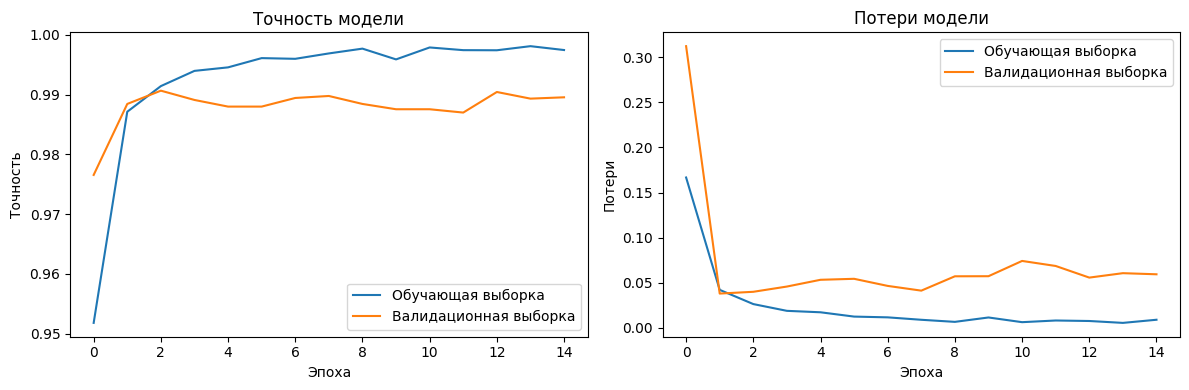

In [13]:
# вывод графиков точности и ошибки
plt.figure(figsize=(12, 4))

# График точности
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Обучающая выборка")
plt.plot(history.history["val_accuracy"], label="Валидационная выборка")
plt.title("Точность модели")
plt.xlabel("Эпоха")
plt.ylabel("Точность")
plt.legend()

# График потерь
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Обучающая выборка")
plt.plot(history.history["val_loss"], label="Валидационная выборка")
plt.title("Потери модели")
plt.xlabel("Эпоха")
plt.ylabel("Потери")
plt.legend()

plt.tight_layout()
plt.show()
